In [1]:
import cmaps
from eofs.standard import Eof
import netCDF4 as nc
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.basemap  import Basemap
from matplotlib import cm
import pandas as pd

from utils.const import ROOT, FILE_NAME, LONS, LATS
from utils.func import convert_date, plot_to_map
from utils.func import csv_to_masked_array as ctm

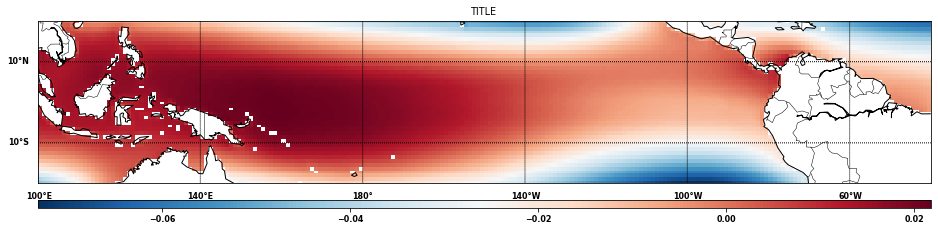

In [2]:
year_ssh = ctm("./year_average/1992.csv")
for i in range(1993, 2018):
    y = ctm("./year_average/{}.csv".format(i))
    year_ssh = npy.ma.append(year_ssh, y, axis=0)
year_ssh.shape

plot_to_map(LONS, LATS, year_ssh.sum(axis=0)/(2018-1992+1), set_cmaps="RdBu_r")

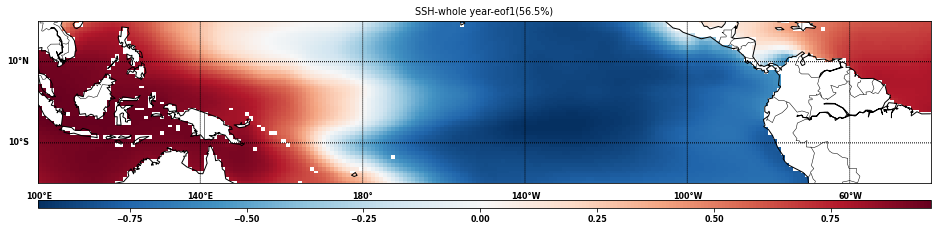

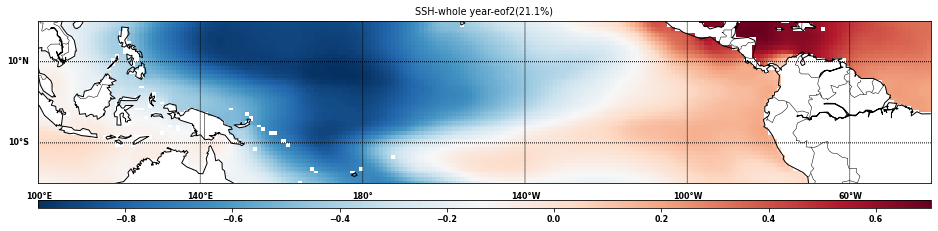

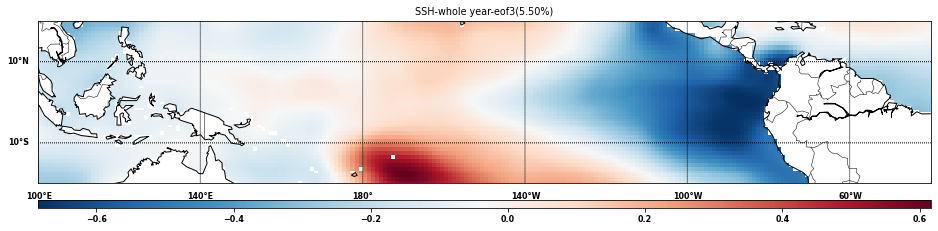

In [16]:
coslat = npy.cos(npy.deg2rad(LATS))
wgts = npy.sqrt(coslat)[..., npy.newaxis]

solver = Eof(year_ssh, weights=wgts)

eof = solver.eofsAsCorrelation(neofs=3)
pc = solver.pcs(npcs=3, pcscaling=1)
var = solver.varianceFraction()

plot_to_map(LONS, LATS, eof[0,:,:], fig_title="SSH-whole year-eof1(56.5%)", set_cmaps="RdBu_r")
plot_to_map(LONS, LATS, eof[1,:,:], fig_title="SSH-whole year-eof2(21.1%)", set_cmaps="RdBu_r")
plot_to_map(LONS, LATS, eof[2,:,:], fig_title="SSH-whole year-eof3(5.50%)", set_cmaps="RdBu_r")

In [4]:
var

array([5.65044682e-01, 2.11357255e-01, 5.50499083e-02, 5.13680160e-02,
       3.53757455e-02, 2.33359063e-02, 1.32192551e-02, 1.04922446e-02,
       6.23597322e-03, 4.92799343e-03, 4.46771982e-03, 3.15979903e-03,
       2.64653703e-03, 2.43676015e-03, 1.89956452e-03, 1.63345316e-03,
       1.50103384e-03, 1.18970819e-03, 9.44550660e-04, 9.08425528e-04,
       7.95766327e-04, 6.69057885e-04, 5.21239491e-04, 4.81214091e-04,
       3.38190599e-04, 4.52650008e-31])

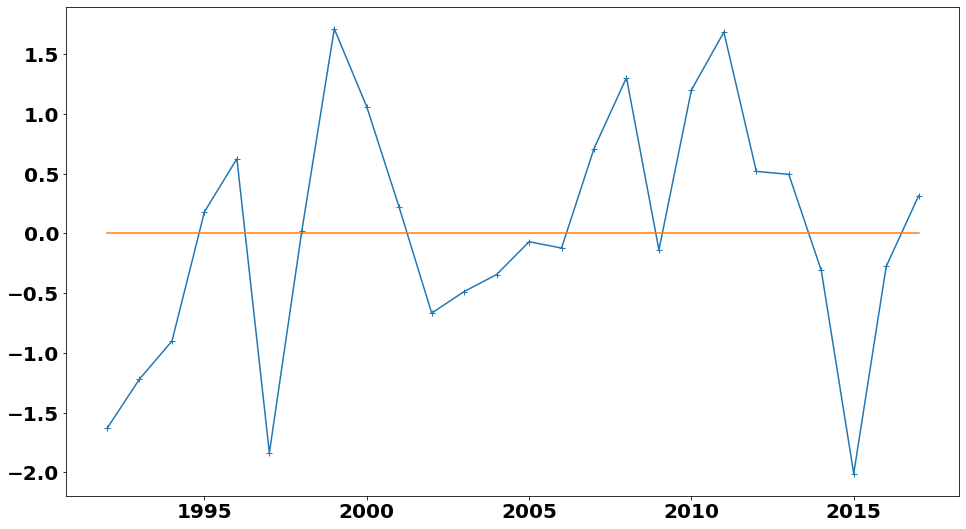

In [15]:
plt.figure(figsize=(16,9))
plt.xticks(size = 20)
plt.yticks(size = 20)
# plt.plot(npy.arange(1992, 2018), pc[:,0], "+-")
plt.plot(npy.arange(1992, 2018), pc[:,0], "-+")
plt.plot([1992, 2017], [0,0])
# plt.plot(npy.array([1994,1995,2002,2003,2004,2005,2009,2010]), [0.1,0,0.1,0,0.1,0,0.1,0], "bo")
# plt.plot(npy.array([1997,1998,2006,2007,2015,2016]), [0.1,0,0.1,0,0.1,0], "ro")
# plt.plot(npy.array([1995,1996,2000,2000,2008,2008,2010,2011]), -npy.array([0.1,0,0.1,0,0.1,0,0.1,0]), "r>")
# plt.plot(npy.array([2001,2001,2011,2012]), -npy.array([0.1,0,0.1,0]), "b>")

上面这个图似乎和红蓝产生了一些规律

In [ ]:
pc[:,0]